In [1]:
import pandas as pd
import numpy as np
import os
import subprocess
from datasets.data_utils import MBIBDataLoader

c:\Users\Yeshwanth Somu\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:


print("------------Processing-datasets------------")
datasets_path = './datasets'
data_dirs = [ name for name in os.listdir(datasets_path) if os.path.isdir(os.path.join(datasets_path, name))]
for d in data_dirs:
    if "pycache" in d or 'mbib' in d:
        continue
    subprocess.call("python " + os.path.join(datasets_path,d,'process.py'),shell=True)
print("------------datasets-processed------------")
print("------------creating-mbib------------")
dl = MBIBDataLoader()
dl.create_all_categories()

------------Processing-datasets------------
------------datasets-processed------------
------------creating-mbib------------
Skipping 049
Skipping 066
Skipping 040
Skipping 087
Skipping 105
Skipping 025
Skipping 049
Skipping 066


In [2]:
file_bias_map = {"cognitive-bias.csv":"Cognitive Bias", "fake-news.csv": "Fake News", "gender-bias.csv": "Gender Bias", "hate-speech.csv": "Hate Speech",
                "linguistic-bias.csv": "Linguistic Bias", "political-bias.csv": "Political Bias", "racial-bias.csv": "Racial Bias", "text-level-bias.csv": "Text Level Bias"}

full_data = []
for i in os.listdir("datasets/mbib-aggregated/"):
    data = pd.read_csv("datasets/mbib-aggregated/"+i)
    data['bias_type'] = file_bias_map[i]
    full_data.append(data)

full_data = pd.concat(full_data)
full_data.loc[~full_data.label.astype(bool), "bias_type"] = "Unbiased" # converting all non-labeled pieces of text to "Unbiased"

full_data

,id,text,label,dataset_id,bias_type
0,072-9268,To vote in Mexico every eligible Mexican citiz...,0,72,Unbiased
1,072-6808,Marco Rubio made it clear Not only does he thi...,0,72,Unbiased
2,072-5150,Ben Carson is running for president to elimina...,0,72,Unbiased
3,072-11817,There are literally teachers now who are getti...,0,72,Unbiased
4,072-7176,Leticia Van de Putte voted to stop schools fro...,0,72,Unbiased
...,...,...,...,...,...
9013,076-27367,Social media I once naively thought it would u...,1,76,Text Level Bias
9014,076-19637,I m guessing LGBTQ POC cissies are SOL,1,76,Text Level Bias
9015,076-24159,People like Eddie are why I sometimes wish thi...,1,76,Text Level Bias
9016,076-25093,I m Mexican you absolute moronic NPC HAHAHAHAH...,1,76,Text Level Bias


In [3]:
full_data["bias_type"].value_counts()

Unbiased           248471
Linguistic Bias    200931
Hate Speech         12498
Gender Bias          8970
Political Bias       8852
Racial Bias          4894
Text Level Bias      4509
Fake News            4271
Cognitive Bias       3546
Name: bias_type, dtype: int64

<Axes: title={'center': 'Breakdown of text by Bias Type'}>

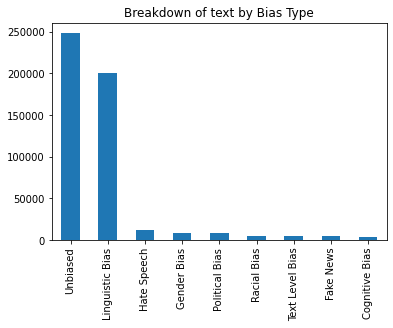

In [8]:
full_data["bias_type"].value_counts().plot(kind="bar", title = "Breakdown of text by Bias Type")

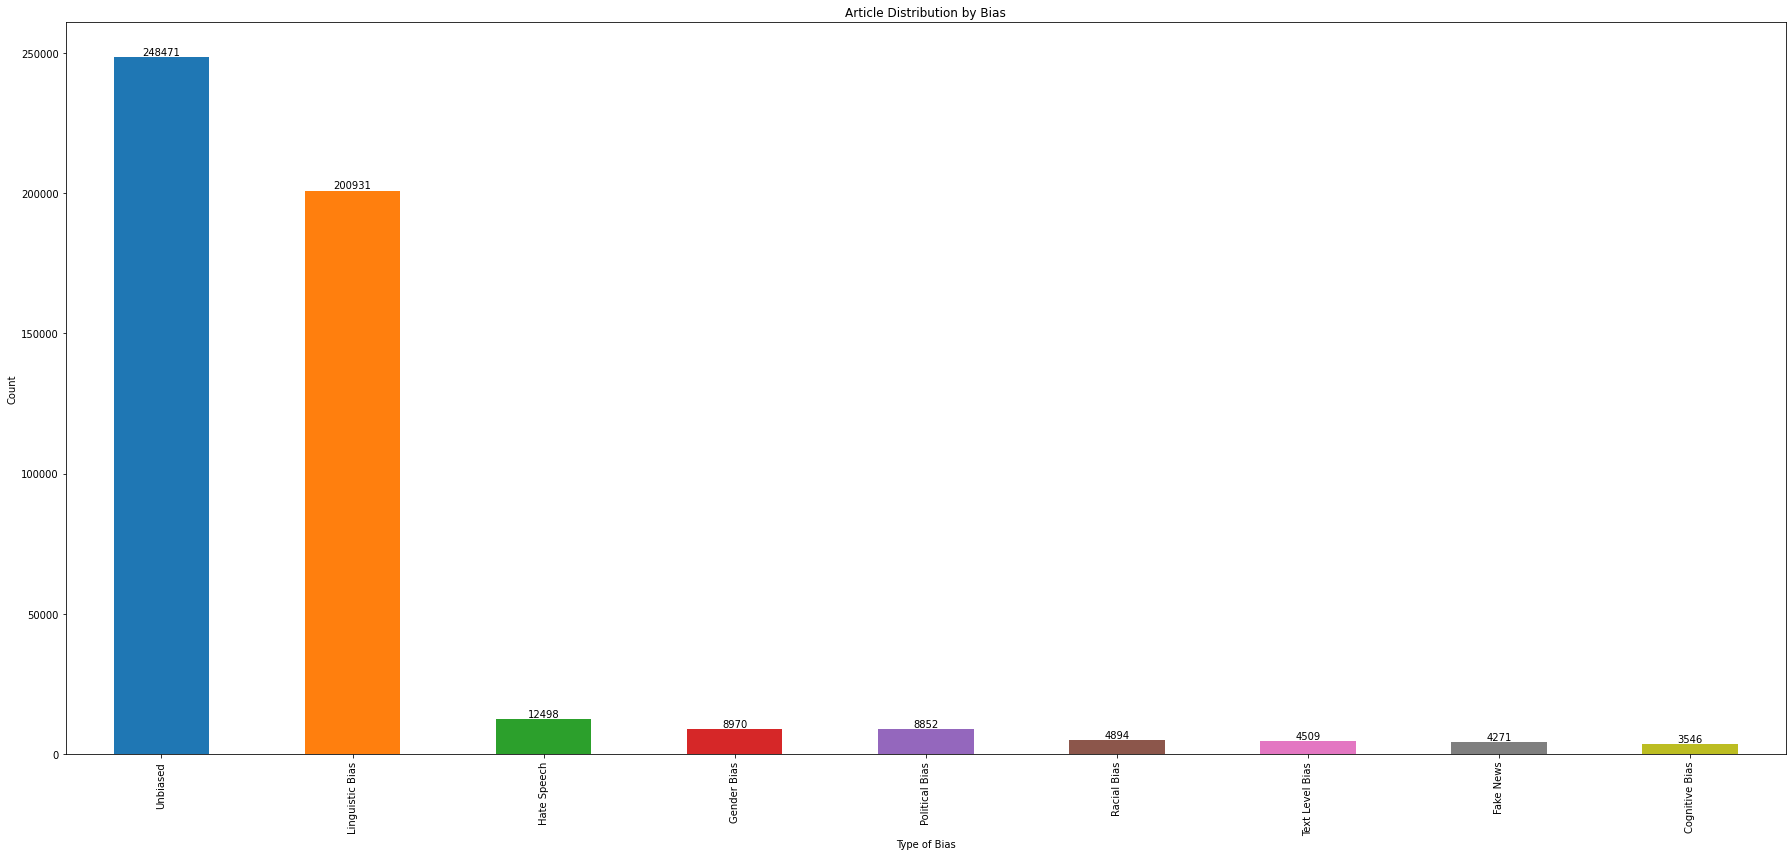

In [9]:
import matplotlib.pyplot as plt

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(25,12))
ax = full_data.bias_type.value_counts().plot(kind="bar", title="Article Distribution by Bias", color=colors, ylabel="Count", xlabel="Type of Bias")
ax.bar_label(ax.containers[0], label_type='edge')
plt.tight_layout()